## Hate Speech Classification

While there is no exact definition of hate speech, in general, it is speech that is intended not just to insult or mock, but to harass and cause lasting pain by attacking something uniquely dear to the target. Hate speech has been especially prevalent in online forums, chatrooms, and social media.

###Modul installation

In [2]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-a34ka2u8
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-a34ka2u8
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7602 sha256=7a2af338677845a1155bc69461d69e6759e115975d9270c0d587f09c314ec9ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-pbqrkqb2/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


Libraries

In [76]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, MaxPooling1D
import preprocess_kgptalkie as ps

Source file

In [77]:

df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/hate_speech_dataset/master/data.csv', index_col = 0)
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


#####0 - hate speech | 1 - offensive language | 2 - neither

In [78]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [79]:
value_count=df['class'].value_counts()
index=list(value_count.index)
count=min(value_count.values)
index,count

([1, 2, 0], 1430)

In [80]:
df_temp=pd.DataFrame()
for i in index:
  temp = df[df['class']==i].sample(count)
  print(temp)
  df_temp = pd.concat([df_temp, temp], ignore_index = True)


       count  hate_speech  offensive_language  neither  class  \
4271       6            0                   6        0      1   
14325      3            1                   2        0      1   
24899      3            0                   3        0      1   
25203      3            0                   3        0      1   
17174      3            0                   3        0      1   
...      ...          ...                 ...      ...    ...   
19256      3            0                   3        0      1   
4300       3            0                   3        0      1   
8404       3            0                   3        0      1   
17938      3            0                   3        0      1   
5981       3            0                   3        0      1   

                                                   tweet  
4271     @MoeEaseYaMind bitches crazy &#128553;&#128514;  
14325  RT @0hallis0n: "This is J Cole you fucking queer"  
24899     retweeting ah bitch tweet is fli

In [81]:
df=df_temp.copy()
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,6,0,6,0,1,@MoeEaseYaMind bitches crazy &#128553;&#128514;
1,3,1,2,0,1,"RT @0hallis0n: ""This is J Cole you fucking queer"""
2,3,0,3,0,1,retweeting ah bitch tweet is flirting nowadays
3,3,0,3,0,1,why bitches gotta be bitches
4,3,0,3,0,1,RT @OhLawdItsNiesha: That hoe Brittish got the...


In [82]:
df['class'].value_counts()

1    1430
2    1430
0    1430
Name: class, dtype: int64

#Preprocessing

In [83]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [84]:
#Cleaning tweets
df['tweet'] = df['tweet'].apply(lambda x: get_clean(x))
df.head()


/usr/local/lib/python3.10/dist-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


,count,hate_speech,offensive_language,neither,class,tweet
0,6,0,6,0,1,moeeaseyamind bitches crazy
1,3,1,2,0,1,retweet 0hallis0n this is j cole you fucking q...
2,3,0,3,0,1,retweeting ah bitch tweet is flirting nowadays
3,3,0,3,0,1,why bitches gotta be bitches
4,3,0,3,0,1,retweet ohlawditsniesha that hoe brittish got ...


##Text Tokenization

In [85]:
text=df['tweet'].tolist()
token=Tokenizer()
token.fit_on_texts(text)
len(token.word_counts)

11781

In [86]:
print(token.index_word)

{1: 'a', 2: 'the', 3: 'i', 4: 'retweet', 5: 'you', 6: 'to', 7: 'is', 8: 'and', 9: 'bitch', 10: 'not', 11: 'my', 12: 'that', 13: 'in', 14: 'of', 15: 'it', 16: 'like', 17: 'me', 18: 'on', 19: 'trash', 20: 'for', 21: 'do', 22: 'be', 23: 'this', 24: 'am', 25: 'your', 26: 'are', 27: 'out', 28: 'ass', 29: 'bitches', 30: 'they', 31: 'with', 32: 'all', 33: 'so', 34: 'just', 35: 'if', 36: 'have', 37: 'fuck', 38: 'he', 39: 'nigga', 40: 'but', 41: 'get', 42: 'up', 43: 'hoes', 44: 'was', 45: 'faggot', 46: 'pussy', 47: 'at', 48: 'no', 49: 'hoe', 50: 'when', 51: 'got', 52: 'about', 53: 'what', 54: 'laughing', 55: 'can', 56: 'she', 57: 'loud', 58: 'white', 59: 'shit', 60: 'these', 61: 'off', 62: 'fucking', 63: 'one', 64: 'who', 65: 'we', 66: 'as', 67: 'know', 68: 'niggas', 69: 'or', 70: 'them', 71: 'from', 72: 'will', 73: 'youre', 74: 'go', 75: 'nigger', 76: 'people', 77: 'her', 78: 'how', 79: 'his', 80: 'some', 81: 'would', 82: 'bird', 83: 'want', 84: 'yankees', 85: 'love', 86: 'hate', 87: 'man', 88

In [87]:
vocab_size=len(token.word_counts)+1

In [88]:
encoded_text=token.texts_to_sequences(text)
print(encoded_text)

[[3792, 29, 351], [4, 3793, 23, 7, 459, 3794, 5, 62, 195], [2316, 408, 9, 290, 7, 3795, 3796], [93, 29, 222, 22, 29], [4, 3797, 12, 49, 3798, 51, 2, 182, 943], [8, 2317, 3799, 4, 3800, 3801, 38, 143, 43], [816, 17, 18, 2318, 29, 3802], [3803, 409, 4, 3804, 3, 24, 608, 26, 136, 3805, 3806, 246, 56, 7, 1, 49], [4, 3807, 3, 21, 10, 196, 29, 3, 223, 29], [3808, 2319, 609, 3, 24, 32, 2320, 197, 3, 237, 13, 1, 155, 460, 536, 38, 7, 352, 76, 16, 5, 144, 22, 3809, 11, 2321, 370, 2322], [9, 817, 18, 663, 28, 944, 203, 728, 2323, 15, 7, 3810, 164, 664, 3811, 3812, 567, 3813], [88, 1, 322, 43, 22, 3814, 20, 125, 1346], [1132, 10, 2324, 6, 1669, 25, 3815, 3816, 13, 3817, 266, 5, 1, 3818, 45], [3, 24, 1670, 152, 1, 3819, 9], [185, 50, 5, 1347, 408, 9, 198, 62, 169, 610, 39, 165, 100, 97, 180, 80, 818, 14, 247], [3820, 21, 10, 410, 537, 29, 8, 30, 568, 28, 2325, 48, 569, 291], [2326, 729, 51, 1, 387, 9, 6, 1348, 18, 17, 411, 13, 11, 1133, 277, 56, 44, 3821, 18, 17, 608, 12, 3822, 11, 28, 61], [88, 1

In [89]:
max_length= max(len(tweet.split()) for tweet in df['tweet'])
X=pad_sequences(encoded_text,maxlen=max_length, padding='post')
print(X)

[[ 3792    29   351 ...     0     0     0]
 [    4  3793    23 ...     0     0     0]
 [ 2316   408     9 ...     0     0     0]
 ...
 [    3    86    43 ...     0     0     0]
 [    4 11779    37 ...     0     0     0]
 [    4 11780    11 ...     0     0     0]]


In [90]:
X.shape

(4290, 38)

In [91]:
y=df['class']
y

0       1
1       1
2       1
3       1
4       1
       ..
4285    0
4286    0
4287    0
4288    0
4289    0
Name: class, Length: 4290, dtype: int64

##Model

In [92]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

One-hot encoding

In [93]:
y =to_categorical(df['class'])
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [94]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4290, 38)
Shape of y: (4290, 3)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [96]:
vec_size = 300
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test), shuffle = True)

Epoch 1/20
108/108 [==============================] - 7s 60ms/step - loss: 0.9473 - accuracy: 0.5810 - val_loss: 0.5859 - val_accuracy: 0.7995
Epoch 2/20
108/108 [==============================] - 7s 64ms/step - loss: 0.5054 - accuracy: 0.8042 - val_loss: 0.4790 - val_accuracy: 0.8205
Epoch 3/20
108/108 [==============================] - 6s 57ms/step - loss: 0.3285 - accuracy: 0.8715 - val_loss: 0.4814 - val_accuracy: 0.8205
Epoch 4/20
108/108 [==============================] - 7s 69ms/step - loss: 0.1857 - accuracy: 0.9356 - val_loss: 0.5407 - val_accuracy: 0.8042
Epoch 5/20
108/108 [==============================] - 7s 61ms/step - loss: 0.1030 - accuracy: 0.9671 - val_loss: 0.5954 - val_accuracy: 0.8007
Epoch 6/20
108/108 [==============================] - 7s 62ms/step - loss: 0.0511 - accuracy: 0.9854 - val_loss: 0.6734 - val_accuracy: 0.7914
Epoch 7/20
108/108 [==============================] - 6s 60ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.7802 - val_accuracy: 0.7716

## Model testing

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [98]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

27/27 [==============================] - 0s 3ms/step


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

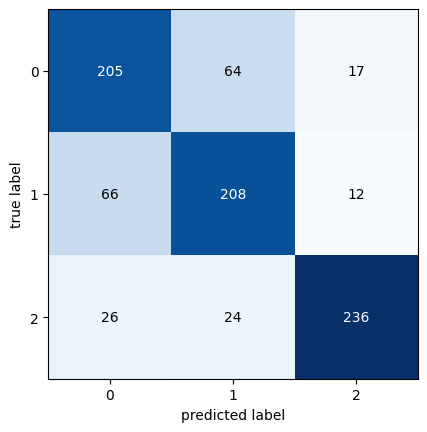

In [99]:
plot_confusion_matrix(confusion_matrix(np.argmax(y_test, axis=-1), y_pred))


In [100]:
print(classification_report(np.argmax(y_test, axis=-1), y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       286
           1       0.70      0.73      0.71       286
           2       0.89      0.83      0.86       286

    accuracy                           0.76       858
   macro avg       0.76      0.76      0.76       858
weighted avg       0.76      0.76      0.76       858



## Custom data - testing

In [101]:
X=' Whatsss uppp, bastard'

In [102]:
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_length, padding = 'post')
  return x


In [103]:
get_encoded(X)

array([[ 297,   42, 3641,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0]], dtype=int32)

In [109]:
y_pred_class=np.argmax(model.predict(get_encoded(X)), axis=-1)
if y_pred_class ==0:
  disc="Hate speech"

if y_pred_class ==1:
  disc=" Ofensive speech"

if y_pred_class ==2:
  disc="Another"

print(disc)


model.save('model_hate_speech.keras',)

1/1 [==============================] - 0s 39ms/step
Hate speech


In [107]:
import pickle
pickle.dump(token, open('token.pkl', 'wb'))